In [101]:
import pandas as pd
import numpy as np
from io import StringIO
import ast
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt


In [102]:
file_1 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_2 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_3 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_4 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_5 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_6 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')
file_7 = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/logt21.txt', 'r')


# empty data frame
df = pd.DataFrame(columns=['Mac', 'SessionMainMenu', 'AppName', 'LogId', 'Event', 'ItemId', 'RealTimePlaying'])
files = [file_1, file_2, file_3, file_4, file_5, file_6, file_7]
useful_features = ['Mac', 'SessionMainMenu', 'AppName', 'LogId', 'Event', 'ItemId', 'RealTimePlaying']


for file in files:
    data = file.read()
    #Converting a text file into a list by splitting the text on the occurrence of newline (‘\n’ )
    data_to_list = data.split('\n')

    #Remove last empty string in data_to_list
    data_to_list = [i for i in data_to_list if not i=='']

    #convert dictionary strings to dictionaries in the list
    list_df=[]
    for i in data_to_list:
        dict_df=ast.literal_eval(i)
        list_df.append(dict_df)
    #Create dataframe from list of dictionary
    df_temp = pd.DataFrame.from_dict(list_df,orient='columns')
    df_features= df_temp[useful_features]
    #concatenate to final data frame
    df = pd.concat([df, df_features])

df.reset_index(inplace= True, drop= True)

df.to_csv('data.csv', sep ='\t')

In [103]:
# split UserID and Timestamp 
new = df['SessionMainMenu'].str.split(":", 
                                      expand = False, 
                                      n  = 1)
new_list = new.to_list()
df_ss = pd.DataFrame(new_list, columns = ['Mac', 'SessionMainMenu'])
df['SessionMainMenu'] = df_ss['SessionMainMenu']

#convert timestamp string to date-time
list_dt = []
for row in df['SessionMainMenu']:

    list_dt.append(datetime.strptime(row,'%Y:%m:%d:%H:%M:%S:%f'))
    
df['SessionMainMenu'] = list_dt


In [104]:
f = open('/Users/loinguyen/Documents/CV-Interview/FPT interview Data Science/code/user_info.txt', "r")

user_info = f.read()

#conver to dataframe
user_str = StringIO(user_info)
df_user_info = pd.read_csv(user_str, 
                           sep ='\t')

# change headers
df_user_info = df_user_info.rename({'MAC': 'Mac', 
                                    '# of days': 'Num_of_days'}, 
                                    axis = 1)


In [105]:
# SessionDate month format
df['SessionDate'] = df['SessionMainMenu'].dt.date
df_min_date = pd.DataFrame(df.groupby(['Mac'], 
                                      as_index=False)['SessionDate'].min())

#Extract min day by UserID (mac)
df_min_date = pd.DataFrame(df.groupby(['Mac'], 
                                      as_index=False)['SessionDate'].min())

df = pd.merge(df, df_min_date, 
              on="Mac", 
              how="left", 
              suffixes=('_dt', '_min'))

# different from specifiec day and starting day
df['diff_min_day'] = (df['SessionDate_dt'] - df['SessionDate_min'])/ np.timedelta64(1, 'D')
df['SessionDate_min']


#Extract max day by UserID (mac)
# Calculate life_time of user (SessionDate_max - SessionDate_mim)
df_max_date = pd.DataFrame(df.groupby(['Mac'], 
                                      as_index=False)['SessionDate_dt'].max())

df = pd.merge(df, df_max_date, on="Mac", 
              how="left",suffixes=('_2', '_max'))

df['life_time'] = (df['SessionDate_dt_max'] - df['SessionDate_min'])/ np.timedelta64(1, 'D')


In [106]:
df['life_time_mt'] = (df['SessionDate_dt_max'] - df['SessionDate_min'])/ np.timedelta64(1, 'M')
df

,Mac,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying,SessionDate_dt_2,SessionDate_min,diff_min_day,SessionDate_dt_max,life_time,life_time_mt
0,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,52,StopVOD,100052388,570.3,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871
1,B046FCAC0DC1,2016-02-11 01:01:56.838,IPTV,40,EnterIPTV,NaN,NaN,2016-02-11,2016-02-11,0.0,2016-02-26,15.0,0.483871
2,B046FCAC0DC1,2016-02-11 01:02:29.258,VOD,55,NextVOD,100052388,NaN,2016-02-11,2016-02-11,0.0,2016-02-26,15.0,0.483871
3,B046FCAC0DC1,2016-02-12 04:44:59.143,IPTV,18,ChangeModule,NaN,NaN,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871
4,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,54,PlayVOD,100052388,NaN,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680731,B046FCB7D706,2016-02-21 14:12:38.844,IPTV,41,StartChannel,46,NaN,2016-02-21,2016-02-06,15.0,2016-02-21,15.0,0.483871
680732,B046FCB7D706,2016-02-21 19:57:54.559,IPTV,41,StartChannel,161,NaN,2016-02-21,2016-02-06,15.0,2016-02-21,15.0,0.483871
680733,B046FCB7D706,2016-02-21 19:27:26.136,IPTV,41,StartChannel,91,NaN,2016-02-21,2016-02-06,15.0,2016-02-21,15.0,0.483871
680734,B046FCB7D706,2016-02-21 19:27:26.136,IPTV,41,StartChannel,5,NaN,2016-02-21,2016-02-06,15.0,2016-02-21,15.0,0.483871


In [107]:
cols_name = list(df.columns)
for col in cols_name:
    print(f'Basic stats for {col}:\n')
    print(df[col].describe())

Basic stats for Mac:

count           680736
unique             168
top       B046FCA981B6
freq             14000
Name: Mac, dtype: object
Basic stats for SessionMainMenu:

count                           680736
mean     2016-02-18 17:42:01.705904640
min         2015-08-11 00:04:13.108000
25%         2016-02-11 18:58:12.780000
50%         2016-02-19 15:18:51.688000
75%         2016-02-24 20:35:21.960000
max         2016-09-20 07:57:17.273000
Name: SessionMainMenu, dtype: object
Basic stats for AppName:

count     680736
unique         2
top         IPTV
freq      503615
Name: AppName, dtype: object
Basic stats for LogId:

count     680736
unique        33
top           41
freq      182973
Name: LogId, dtype: object
Basic stats for Event:

count           680736
unique              33
top       StartChannel
freq            182973
Name: Event, dtype: object
Basic stats for ItemId:

count     570346
unique      1759
top            1
freq       44149
Name: ItemId, dtype: object
Basic stats

Text(0, 0.5, 'Frequency')

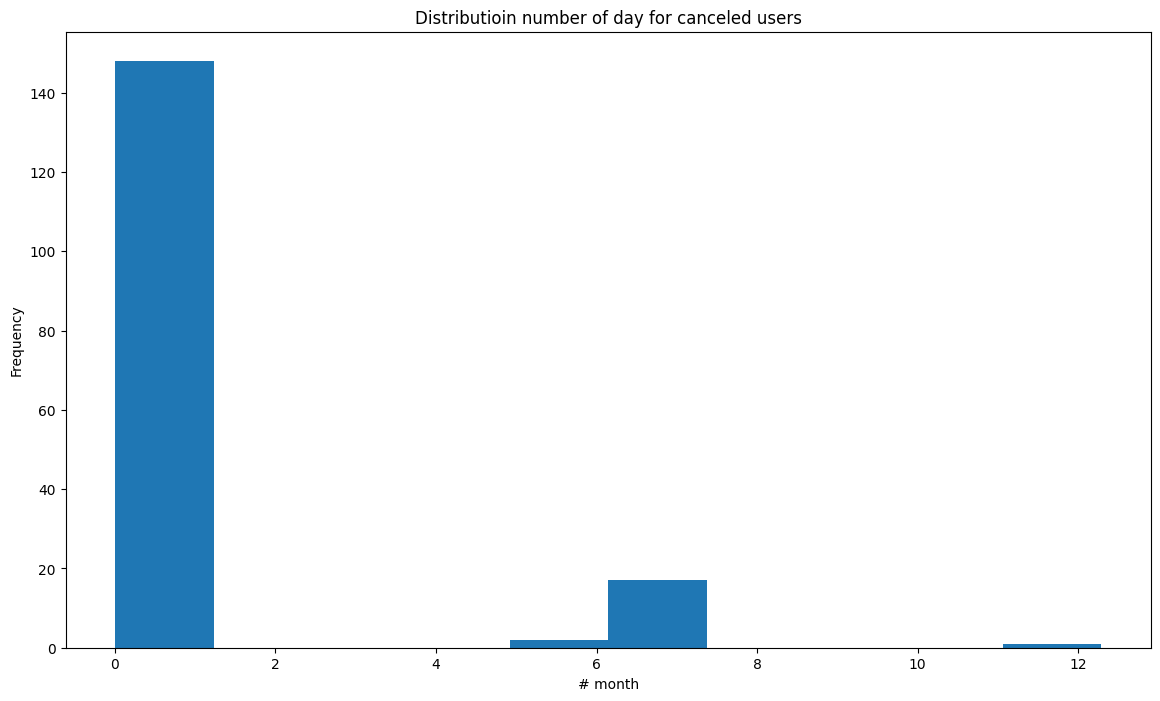

In [108]:
df_chart = df[['Mac', 'life_time_mt']].drop_duplicates().reset_index(drop = True)

ax = (df_chart['life_time_mt']).plot(kind = 'hist',
                                     figsize= (14,8),
                                     title = 'Distributioin number of day for canceled users')
ax.set_xlabel("# month")
ax.set_ylabel("Frequency")

In [109]:
print('Ratio of user who used service less than 12 months: ')
print(len(df[(df['life_time']/30 <= 12)]['Mac'].unique())*100/len(df['Mac'].unique()))
print('\nRatio of user who used service less than 7 months: ')
print(len(df[(df['life_time']/30 <= 7)]['Mac'].unique())*100/len(df['Mac'].unique()))
print('\nRatio of user who used service less than 2 months:')
print(len(df[(df['life_time']/30 <= 2)]['Mac'].unique())*100/len(df['Mac'].unique()))

(df['life_time']/30).describe()

Ratio of user who used service less than 12 months: 
99.4047619047619

Ratio of user who used service less than 7 months: 
96.42857142857143

Ratio of user who used service less than 2 months:
88.0952380952381


count    680736.000000
mean          1.799070
std           2.560865
min           0.000000
25%           0.700000
50%           0.800000
75%           0.866667
max          12.700000
Name: life_time, dtype: float64

Text(0, 0.5, 'Frequency')

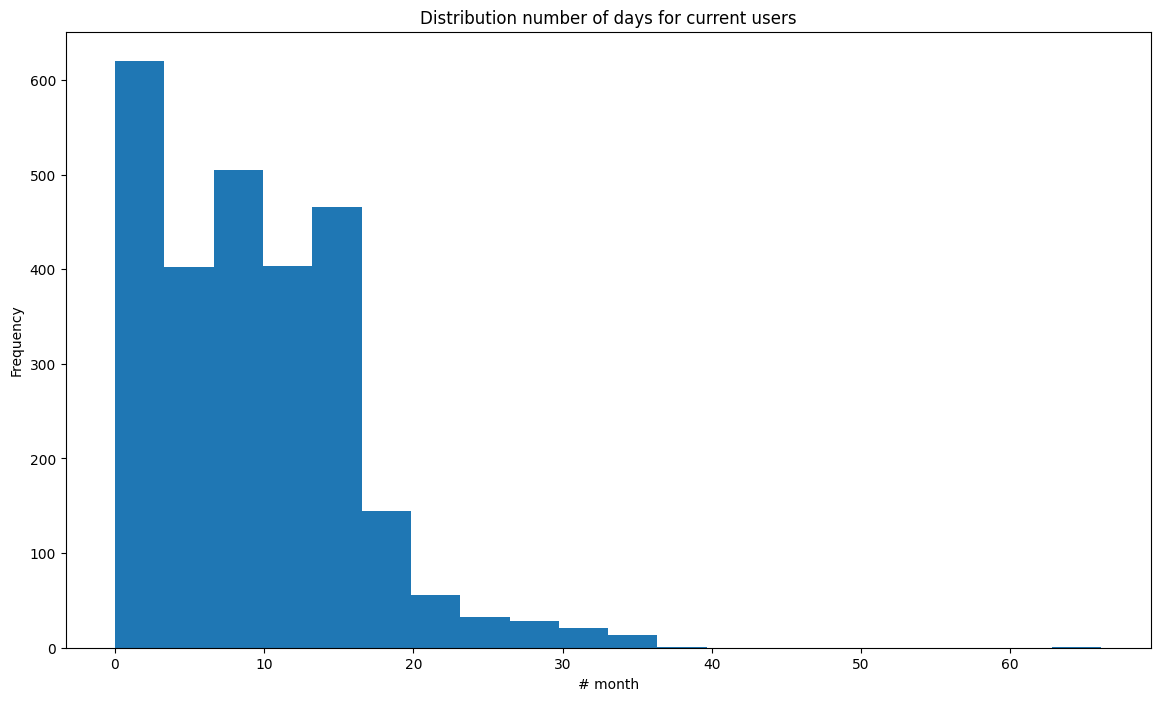

In [110]:
ax = (df_user_info['Num_of_days']/30).plot(kind='hist',
                                    figsize=(14,8),
                                    bins = 20,
                                    title="Distribution number of days for current users")
ax.set_xlabel("# month")
ax.set_ylabel("Frequency")

In [111]:
print('Ratio of user who used service less than 12 months: ')
print(len(df_user_info[(df_user_info['Num_of_days']/30 <= 12)]['Mac'].unique())*100/len(df_user_info['Mac'].unique()))
print('\nRatio of user who used service less than 7 months: ')
print(len(df_user_info[(df_user_info['Num_of_days']/30 <= 7)]['Mac'].unique())*100/len(df_user_info['Mac'].unique()))
print('\nRatio of user who used service less than 2 months:')
print(len(df_user_info[(df_user_info['Num_of_days']/30 <= 2)]['Mac'].unique())*100/len(df_user_info['Mac'].unique()))


Ratio of user who used service less than 12 months: 
64.67717717717717

Ratio of user who used service less than 7 months: 
39.6021021021021

Ratio of user who used service less than 2 months:
15.352852852852854


In [112]:
(df_user_info['Num_of_days']/30).describe()

count    2692.000000
mean        9.306389
std         6.739680
min         0.000000
25%         3.733333
50%         8.800000
75%        13.675000
max        66.100000
Name: Num_of_days, dtype: float64

Text(0, 0.5, 'Frequency')

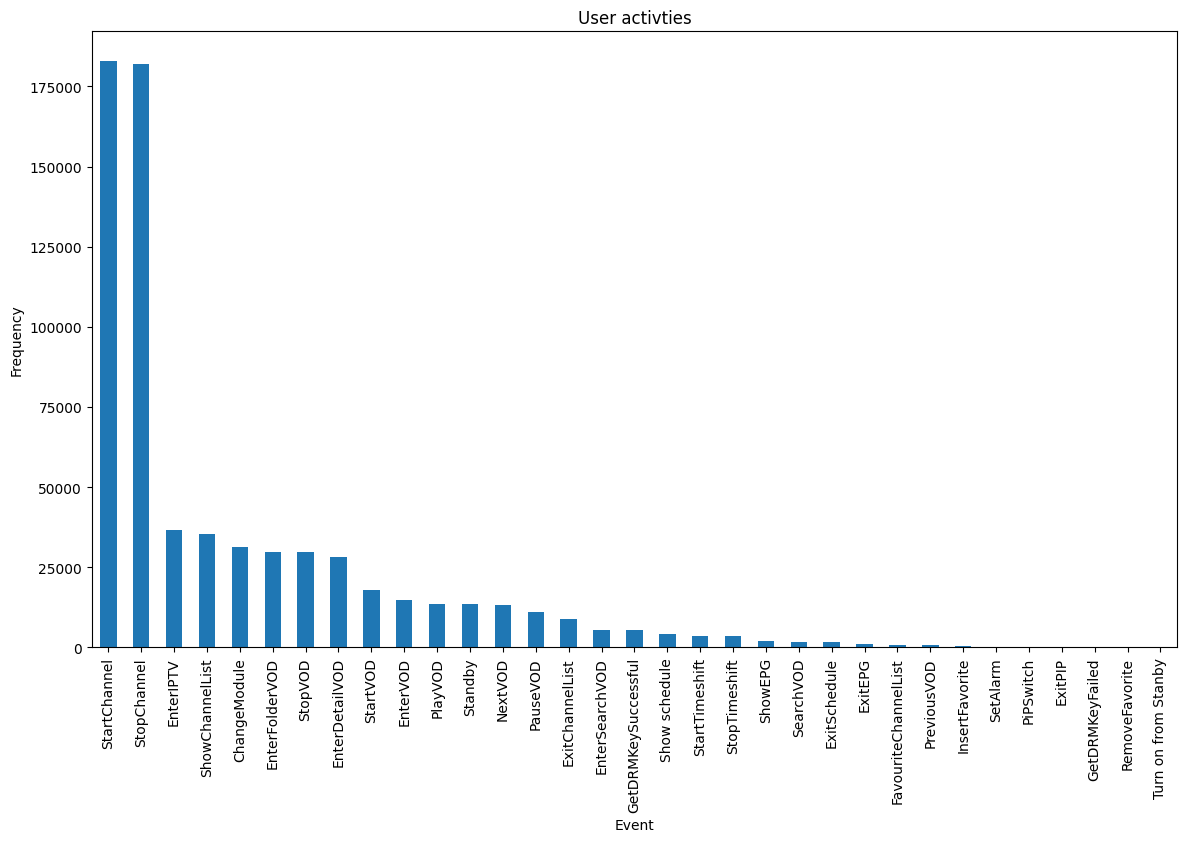

In [113]:
ax = df['Event'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="User activties")
ax.set_xlabel("Event")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

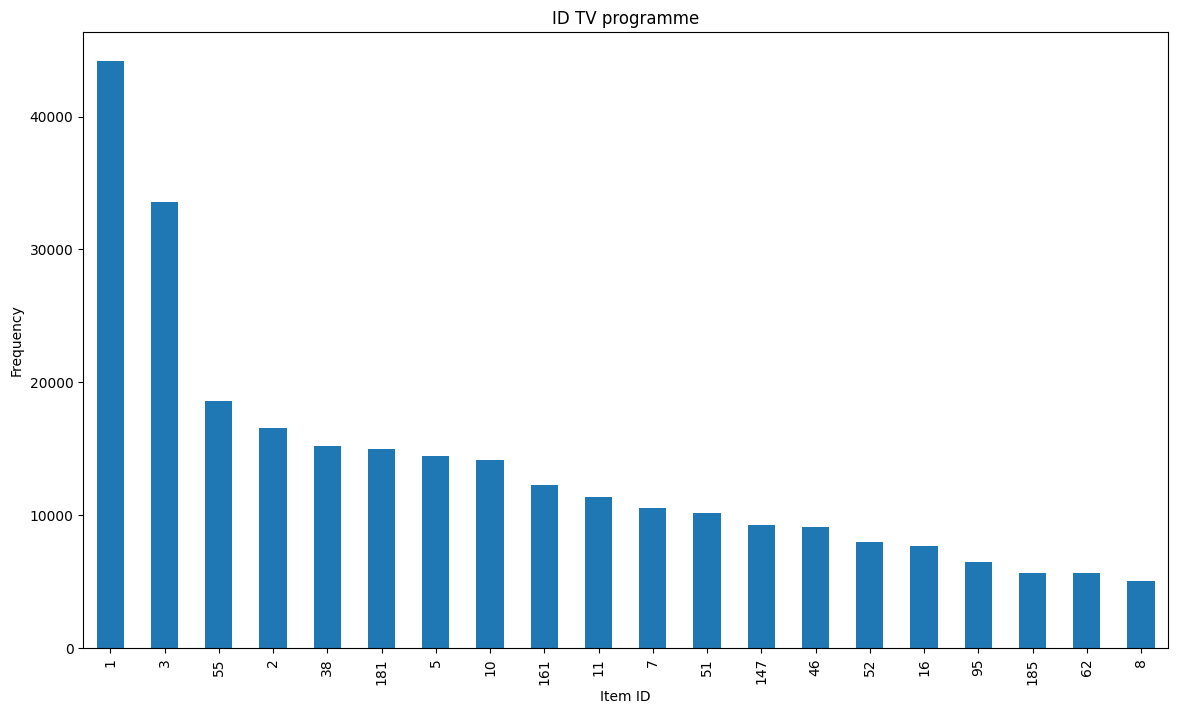

In [114]:
ax = df['ItemId'].value_counts()[:20].plot(kind='bar',
                                    figsize=(14,8),
                                    title="ID TV programme")
ax.set_xlabel("Item ID")
ax.set_ylabel("Frequency")

In [115]:
df['AppName'].value_counts()[0]/df['Mac'].count()

0.7398095590654821

Text(0, 0.5, 'Frequency')

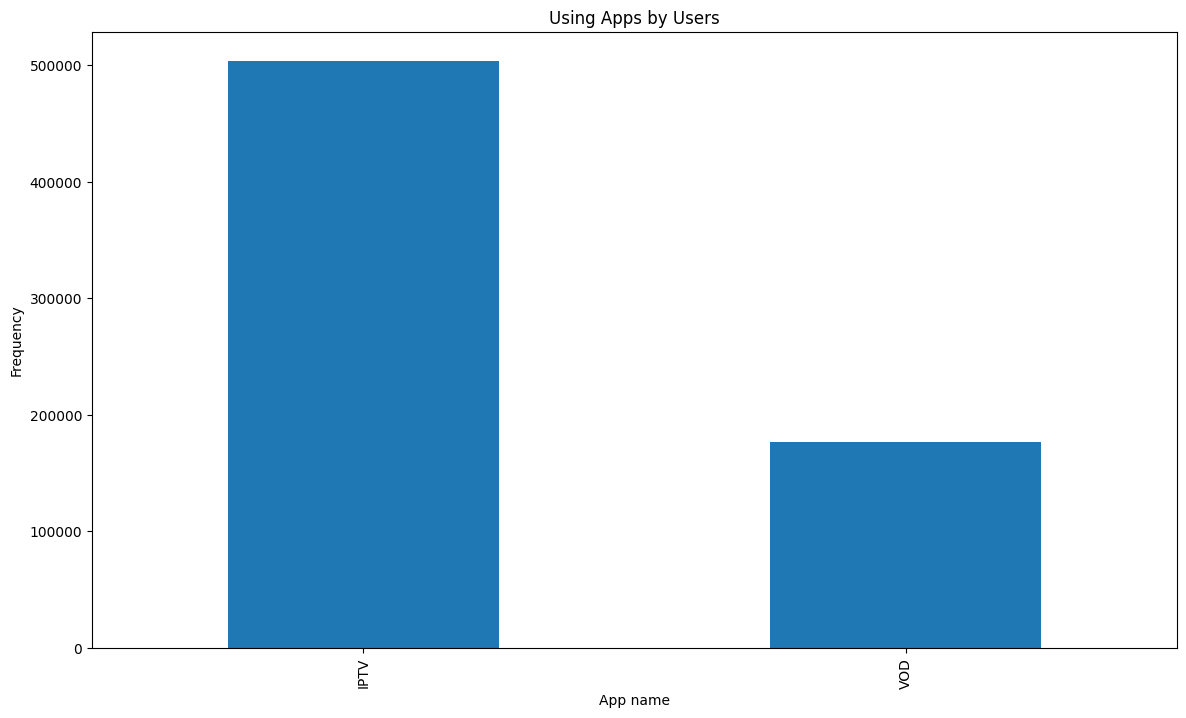

In [116]:
ax = df['AppName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Using Apps by Users")
ax.set_xlabel("App name")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

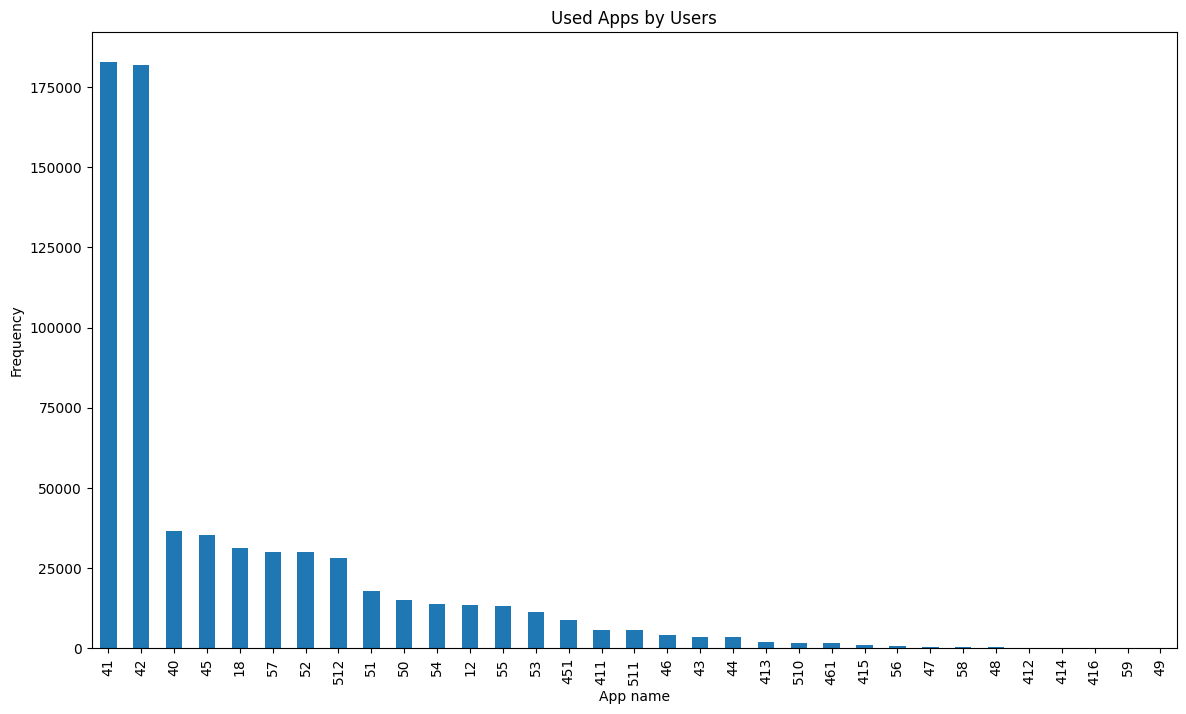

In [117]:
ax = df['LogId'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Used Apps by Users")
ax.set_xlabel("App name")
ax.set_ylabel("Frequency")

In [118]:
# Real time play with a day of each users

df['RealTimePlaying'] = df['RealTimePlaying'].astype(float, copy=True, errors='raise')

df_temp = df.groupby(['Mac', 'SessionDate_dt_2'], as_index= False)['RealTimePlaying'].sum()
df_real_time_playing = pd.DataFrame(df_temp)
(df_real_time_playing['RealTimePlaying']/3600).describe()

count    2140.000000
mean       25.296506
std        66.604215
min         0.000000
25%         2.516011
50%        12.223028
75%        28.311014
max      2199.881779
Name: RealTimePlaying, dtype: float64

In [119]:
df_temp = df_real_time_playing.groupby('Mac', as_index= False)['RealTimePlaying'].mean()
len(df_temp[df_temp['RealTimePlaying']/3600<24]['Mac'].unique())

118

(0.0, 100.0)

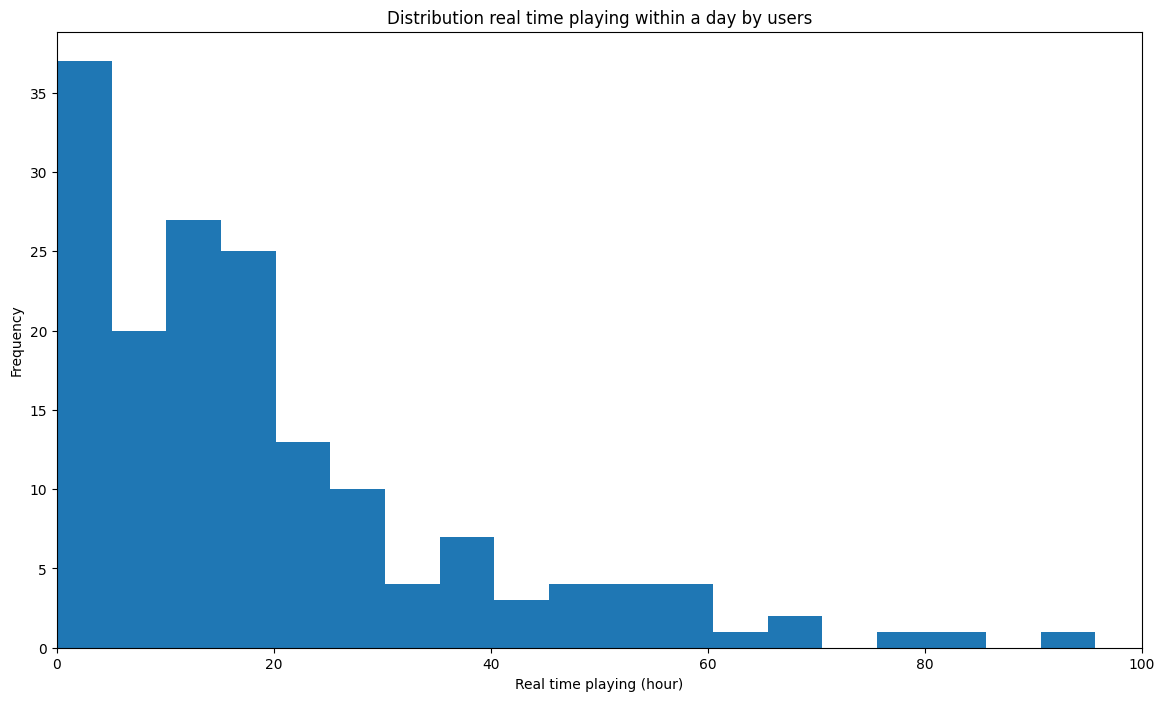

In [120]:
time_play_list = df_real_time_playing.groupby('Mac')['RealTimePlaying'].mean()/3600

ax = time_play_list.plot(kind='hist',
                                    figsize=(14,8),
                                    bins = 60,
                                    title="Distribution real time playing within a day by users")
ax.set_xlabel("Real time playing (hour)")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 100)

(0.0, 100.0)

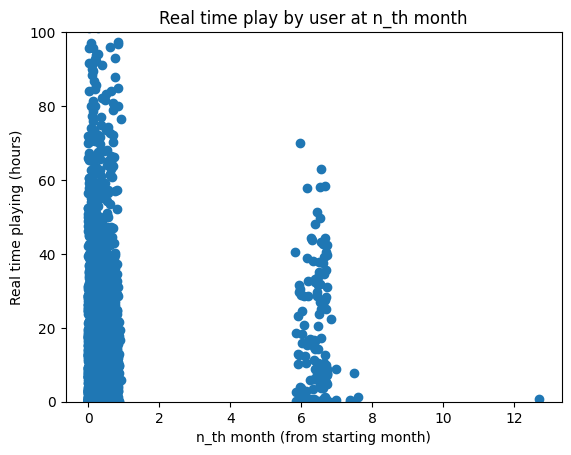

In [121]:
df_temp = df.groupby(['Mac', 'diff_min_day'], as_index= False)['RealTimePlaying'].sum()
df_real_time_playing = pd.DataFrame(df_temp)
##time_play_list = list(df_real_time_playing.groupby('Mac')['RealTimePlaying'].mean()/3600)

plt.plot(df_real_time_playing['diff_min_day']/30, df_real_time_playing['RealTimePlaying']/3600, 'o')
plt.title("Real time play by user at n_th month")
plt.xlabel("n_th month (from starting month)")
plt.ylabel("Real time playing (hours)")
plt.ylim(0, 100)

(0.0, 40.0)

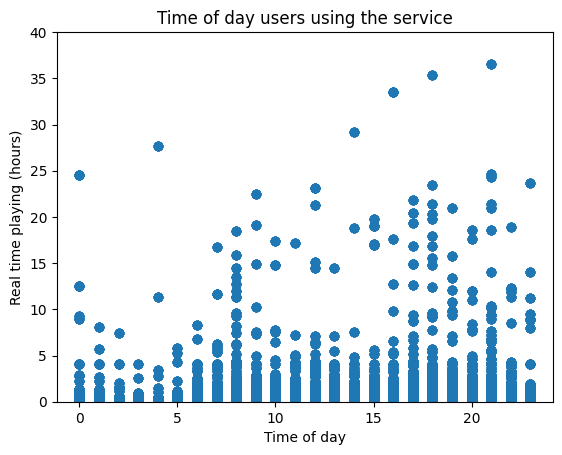

In [122]:
df['watching_time'] = df['SessionMainMenu'].dt.hour
df_ss_time_playing_time = df[df['RealTimePlaying'].notna()][['watching_time', 'RealTimePlaying']]

plt.plot(df_ss_time_playing_time['watching_time'], df_ss_time_playing_time['RealTimePlaying']/3600, 'o')
plt.title("Time of day users using the service")
plt.xlabel("Time of day")
plt.ylabel("Real time playing (hours)")
plt.ylim(0,40)

Text(0, 0.5, 'Frequency')

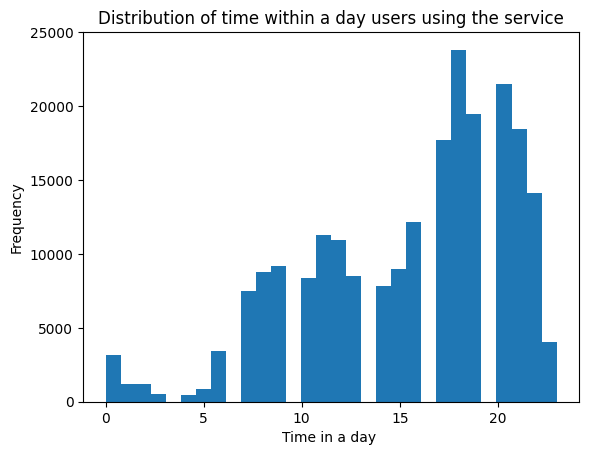

In [123]:
plt.hist(df_ss_time_playing_time['watching_time'], bins = 30)
plt.title("Distribution of time within a day users using the service")
plt.xlabel("Time in a day ")
plt.ylabel("Frequency")

In [124]:
more_then_one_items = df_real_time_playing[df_real_time_playing['RealTimePlaying']/3600> 24]['Mac'].unique()
df[df['Mac'].isin(more_then_one_items)]

,Mac,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying,SessionDate_dt_2,SessionDate_min,diff_min_day,SessionDate_dt_max,life_time,life_time_mt,watching_time
0,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,52,StopVOD,100052388,570.3,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871,12
1,B046FCAC0DC1,2016-02-11 01:01:56.838,IPTV,40,EnterIPTV,NaN,NaN,2016-02-11,2016-02-11,0.0,2016-02-26,15.0,0.483871,1
2,B046FCAC0DC1,2016-02-11 01:02:29.258,VOD,55,NextVOD,100052388,NaN,2016-02-11,2016-02-11,0.0,2016-02-26,15.0,0.483871,1
3,B046FCAC0DC1,2016-02-12 04:44:59.143,IPTV,18,ChangeModule,NaN,NaN,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871,4
4,B046FCAC0DC1,2016-02-12 12:35:13.437,VOD,54,PlayVOD,100052388,NaN,2016-02-12,2016-02-11,1.0,2016-02-26,15.0,0.483871,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679731,B046FCAD1AC0,2016-02-29 13:52:34.722,VOD,54,PlayVOD,100027492,NaN,2016-02-29,2016-02-16,13.0,2016-02-29,13.0,0.419355,13
679732,B046FCAD1AC0,2016-02-29 13:52:34.722,VOD,55,NextVOD,100036936,NaN,2016-02-29,2016-02-16,13.0,2016-02-29,13.0,0.419355,13
679733,B046FCAD1AC0,2016-02-29 13:52:34.722,VOD,52,StopVOD,100027492,568.2,2016-02-29,2016-02-16,13.0,2016-02-29,13.0,0.419355,13
679734,B046FCAD1AC0,2016-02-29 13:52:34.722,VOD,52,StopVOD,100027492,1226.1,2016-02-29,2016-02-16,13.0,2016-02-29,13.0,0.419355,13
